In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import umap
from vis_utils.utils import filter_graph, get_UMAP_push_weight_keops
from vis_utils.plot import hists_from_graph_embd
import os
import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
fig_path = "../figures"
data_path_c_elegans = "../data/packer_c-elegans"
data_path_cifar = "../data/cifar10"
data_path_lung_cancer = "../data/zilionis_cancer"
data_path_pbmc = "../data/zheng_pbmc/"

seed = 0

In [9]:
alpha=0.5
min_dist = 0.1
spread = 1.0
a, b= umap.umap_.find_ab_params(spread=spread, min_dist=min_dist)

# Histograms of C. elegans similarities

In [4]:
# load precomputed UMAP instance
with open(os.path.join(data_path_c_elegans, f"umapperns_after_seed_{seed}_eucl.pkl"), "rb") as file:
    umapperns = pickle.load(file)
    embd = umapperns.embedding_

# filter graph as done during the UMAP optimization
c_elegans_fil_graph = filter_graph(umapperns.graph_, umapperns.n_epochs).tocoo()


Sat Aug  7 13:57:25 2021 Building and compiling search function


In [5]:
# compute the historgrams
hist_high_c_elegans, \
hist_high_pos_c_elegans, \
hist_target_c_elegans, \
hist_target_pos_c_elegans, \
hist_low_c_elegans, \
hist_low_pos_c_elegans, \
bins_c_elegans = hists_from_graph_embd(graph=c_elegans_fil_graph,
                                       embedding=embd,
                                       a=a,
                                       b=b)

Historgram counts should match product of input tensor shapes, but are 7400128576 and 7400128556.


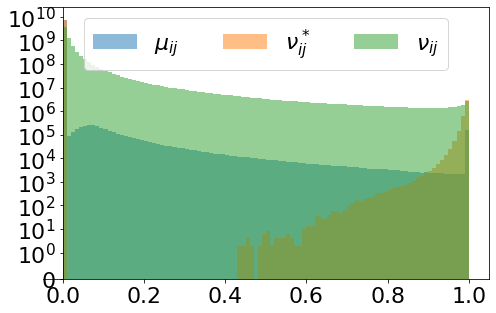

In [6]:
# plot histogram of all edges
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_high_c_elegans, alpha=alpha, label=r"$\mu_{ij}$")
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_target_c_elegans, alpha=alpha, label=r"$\nu_{ij}^*$")
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_low_c_elegans, alpha=alpha, label=r"$\nu_{ij}$")

plt.legend(loc="upper center",  ncol=3)
plt.yscale("symlog", linthresh=1)
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
plt.savefig(os.path.join(fig_path, f"c_elegans_hist_sims_all_log_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

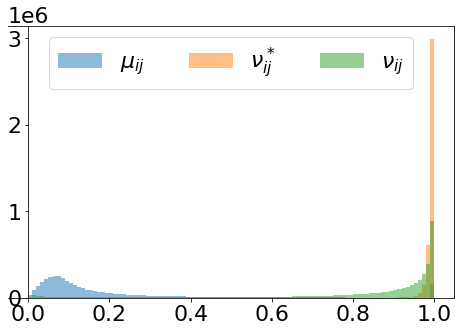

In [7]:
# plot histogram of positive high-dimensional edges
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_high_pos_c_elegans, alpha=alpha, label=r"$\mu_{ij}$")
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_target_pos_c_elegans, alpha=alpha, label=r"$\nu_{ij}^*$")
plt.hist(bins_c_elegans[:-1], bins_c_elegans, weights=hist_low_pos_c_elegans, alpha=alpha, label=r"$\nu_{ij}$")

plt.legend(loc="upper center", ncol=3)
#plt.yscale("symlog", linthresh=1)
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
plt.savefig(os.path.join(fig_path, f"c_elegans_hist_sims_pos_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

In [8]:
# load UMAP instance with inverted high-dimensional similarities
seed=0
with open(os.path.join(data_path_c_elegans, f"umapperns_inv_seed_{seed}.pkl"), "rb") as file:
    umapperns_inv = pickle.load(file)
    embd_inv = umapperns_inv.embedding_

c_elegans_inv_fil_graph = filter_graph(umapperns_inv.graph_, umapperns.n_epochs).tocoo()



In [9]:
# compute all histograms
hist_high_c_elegans_inv, \
hist_high_pos_c_elegans_inv, \
hist_target_c_elegans_inv, \
hist_target_pos_c_elegans_inv, \
hist_low_c_elegans_inv, \
hist_low_pos_c_elegans_inv, \
bins_c_elegans_inv= hists_from_graph_embd(graph=c_elegans_inv_fil_graph,
                                          embedding=embd_inv,
                                          a=a,
                                          b=b)



Historgram counts should match product of input tensor shapes, but are 7400128576 and 7400128402.


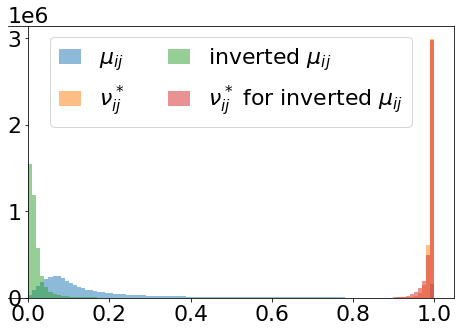

In [10]:
# compare histograms of for positive high-dimensional and target similarities for normal and inverted high-dimensional similarities
alpha=0.5
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))
plt.hist(bins_c_elegans[:-1],
         bins_c_elegans,
         weights=hist_high_pos_c_elegans,
         alpha=alpha,
         label=r"$\mu_{ij}$")
plt.hist(bins_c_elegans[:-1],
         bins_c_elegans,
         weights=hist_target_pos_c_elegans,
         alpha=alpha,
         label=r"$\nu_{ij}^*$")

plt.hist(bins_c_elegans_inv[:-1],
         bins_c_elegans_inv,
         weights=hist_high_pos_c_elegans_inv,
         alpha=alpha,
         label=r"inverted $\mu_{ij}$")
plt.hist(bins_c_elegans_inv[:-1],
         bins_c_elegans_inv,
         weights=hist_target_pos_c_elegans_inv,
         alpha=alpha,
         label=r"$\nu_{ij}^*$ for inverted $\mu_{ij}$")

plt.legend(loc="upper center",  ncol=2, handlelength=1.0)
#plt.yscale("symlog", linthresh=1)
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
#plt.savefig(os.path.join(fig_path, f"c_elegans_compare_no_inv_inv_{seed}.png"),
#            bbox_inches = 'tight',
#            pad_inches = 0,dpi=300)

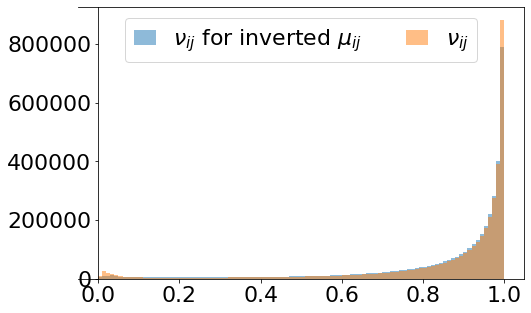

In [11]:
alpha=0.5
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))
plt.hist(bins_c_elegans[:-1],
         bins_c_elegans,
         weights=hist_low_pos_c_elegans_inv,
         alpha=alpha,
         label=r"$\nu_{ij}$ for inverted $\mu_{ij}$")
plt.hist(bins_c_elegans[:-1],
         bins_c_elegans,
         weights=hist_low_pos_c_elegans,
         alpha=alpha,
         label=r"$\nu_{ij}$")

plt.legend(loc="upper center",  ncol=2, handlelength=1.0)
#plt.yscale("symlog", linthresh=1)
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
#plt.savefig(os.path.join(fig_path, f"c_elegans_compare_no_inv_inv_low_dim_{seed}.png"),
#            bbox_inches = 'tight',
#            pad_inches = 0,dpi=300)
# difference between low-dim sims for non-inverted and inverted is barely visible

In [13]:
# maximal true repulsive weight
c_elegans_push_weights_keops, _ = get_UMAP_push_weight_keops(high_sim=c_elegans_fil_graph,
                                                             negative_sample_rate=umapperns.negative_sample_rate)
print(c_elegans_push_weights_keops.max(1).max())

# average intended repulsive weight

n_pairs = np.prod(c_elegans_fil_graph.shape)
avg_high_sim_push_weight = 1/n_pairs * ((1-c_elegans_fil_graph.data).sum()  # rep weights below one
                           + n_pairs - c_elegans_fil_graph.nnz) # rep weights equal one
print(avg_high_sim_push_weight)


Compiling libKeOpstorch1d2e57d9b3 in /net/hcihome/storage/sdamrich/.cache/pykeops-1.4.2-cpython-38:
       formula: Max_Reduction((((IntCst(5) * Var(0,1,0)) * Var(1,1,1)) / Var(2,1,2)),0)
       aliases: Var(0,1,0); Var(1,1,1); Var(2,1,2); 
       dtype  : float32
... Done.
tensor(0.0043, device='cuda:0')
0.9998971757730714


# Histograms of PBMC similarities

In [11]:
# load precomputed UMAP instance
with open(os.path.join(data_path_pbmc, f"umapperns_after_seed_{seed}.pkl"), "rb") as file:
    umapperns_pbmc = pickle.load(file)
    embd_pbmc = umapperns_pbmc.embedding_

pbmc_fil_graph = filter_graph(umapperns_pbmc.graph_, umapperns_pbmc.n_epochs).tocoo()



Tue Oct 19 11:02:06 2021 Building and compiling search function


In [12]:
hist_high_pbmc, \
hist_high_pos_pbmc, \
hist_target_pbmc, \
hist_target_pos_pbmc, \
hist_low_pbmc, \
hist_low_pos_pbmc, \
bins_pbmc = hists_from_graph_embd(graph=pbmc_fil_graph,
                                       embedding=embd_pbmc,
                                       a=a,
                                       b=b)

Historgram counts should match product of input tensor shapes, but are 4699239601 and 4699239553.


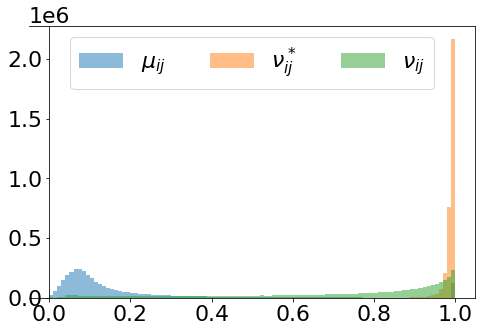

In [14]:
# plot histogram of positive high-dimensional edges
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))
plt.hist(bins_pbmc[:-1], bins_pbmc, weights=hist_high_pos_pbmc, alpha=alpha, label=r"$\mu_{ij}$")
plt.hist(bins_pbmc[:-1], bins_pbmc, weights=hist_target_pos_pbmc, alpha=alpha, label=r"$\nu_{ij}^*$")
plt.hist(bins_pbmc[:-1], bins_pbmc, weights=hist_low_pos_pbmc, alpha=alpha, label=r"$\nu_{ij}$")

plt.legend(loc="upper center", ncol=3)
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
plt.savefig(os.path.join(fig_path, f"pbmc_hist_sims_pos_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,
            dpi=300)



# Histograms of Lunc cancer dataset similarities

In [15]:
# load precomputed UMAP instance
with open(os.path.join(data_path_lung_cancer, f"umapperns_after_seed_{seed}.pkl"), "rb") as file:
    umapperns_lung_cancer = pickle.load(file)
    embd_lung_cancer = umapperns_lung_cancer.embedding_

lung_cancer_fil_graph = filter_graph(umapperns_lung_cancer.graph_, umapperns_lung_cancer.n_epochs).tocoo()



Tue Oct 19 11:04:55 2021 Building and compiling search function


In [16]:
hist_high_lung_cancer, \
hist_high_pos_lung_cancer, \
hist_target_lung_cancer, \
hist_target_pos_lung_cancer, \
hist_low_lung_cancer, \
hist_low_pos_lung_cancer, \
bins_lung_cancer = hists_from_graph_embd(graph=lung_cancer_fil_graph,
                                       embedding=embd_lung_cancer,
                                       a=a,
                                       b=b)

Historgram counts should match product of input tensor shapes, but are 2397962961 and 2397962939.


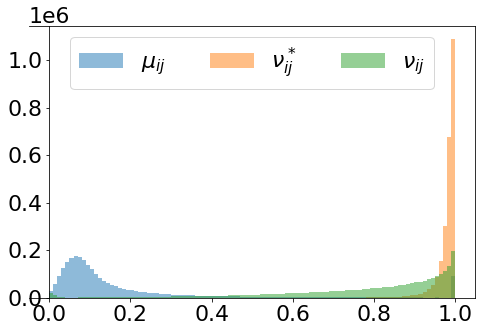

In [17]:
# plot histogram of positive high-dimensional edges
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))
plt.hist(bins_lung_cancer[:-1], bins_lung_cancer, weights=hist_high_pos_lung_cancer, alpha=alpha, label=r"$\mu_{ij}$")
plt.hist(bins_lung_cancer[:-1], bins_lung_cancer, weights=hist_target_pos_lung_cancer, alpha=alpha, label=r"$\nu_{ij}^*$")
plt.hist(bins_lung_cancer[:-1], bins_lung_cancer, weights=hist_low_pos_lung_cancer, alpha=alpha, label=r"$\nu_{ij}$")

plt.legend(loc="upper center", ncol=3)
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
plt.savefig(os.path.join(fig_path, f"lung_cancer_hist_sims_pos_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,
            dpi=300)


# Histogram of CIFAR similarities

In [23]:
# load precomputed UMAP instance
with open(os.path.join(data_path_cifar, f"umapperns_after_seed_{seed}.pkl"), "rb") as file:
    umapperns_cifar = pickle.load(file)
    embd_cifar = umapperns_cifar.embedding_

cifar_fil_graph = filter_graph(umapperns_cifar.graph_, 200).tocoo()


Tue Oct 19 11:09:22 2021 Building and compiling search function


In [24]:
hist_high_cifar, \
hist_high_pos_cifar, \
hist_target_cifar, \
hist_target_pos_cifar, \
hist_low_cifar, \
hist_low_pos_cifar, \
bins_cifar = hists_from_graph_embd(graph=cifar_fil_graph,
                                       embedding=embd_cifar,
                                       a=a,
                                       b=b)

Historgram counts should match product of input tensor shapes, but are 3600000000 and 3599999960.


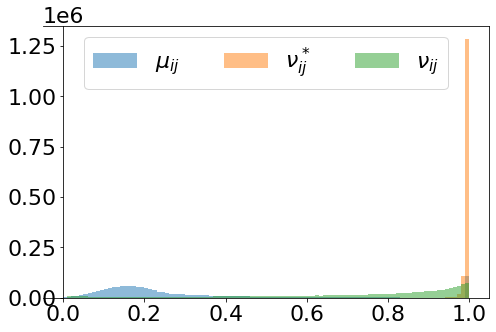

In [25]:
# plot histogram of positive high-dimensional edges
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(8, 5))
plt.hist(bins_cifar[:-1], bins_cifar, weights=hist_high_pos_cifar, alpha=alpha, label=r"$\mu_{ij}$")
plt.hist(bins_cifar[:-1], bins_cifar, weights=hist_target_pos_cifar, alpha=alpha, label=r"$\nu_{ij}^*$")
plt.hist(bins_cifar[:-1], bins_cifar, weights=hist_low_pos_cifar, alpha=alpha, label=r"$\nu_{ij}$")

plt.legend(loc="upper center", ncol=3)
plt.gca().spines['left'].set_position("zero")
plt.gca().spines['bottom'].set_position("zero")
plt.savefig(os.path.join(fig_path, f"cifar_hist_sims_pos_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,
            dpi=300)


